In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import re

In [28]:
#change file name
path = "puzzle.sav"
def load_puzzle(path):
    file = open(path, "r")
    desc = []
    numered_block = {}
    for line in file:
        print(line)
        text = line.strip().split(":")
        if text[0].strip() == "DESC":
            desc = re.findall('.', text[2].strip())
    print(desc)
    grid = np.zeros((7, 7), dtype=int)
    i = 0
    run = 0
    for x in range(7):
        for y in range(7):
            c = '\0'

            if run == 0:
                c = desc[i]
                i = i + 1
                if c >= 'a' and c <= 'z':
                    run = ord(c) - ord('a') + 1

            if run > 0:
                c = 'S'
                run = run - 1

            if c == '0' or c == '1' or c == '2' or c == '3' or c == '4':
                grid[x, y] = ord(c) - ord('0')
                numered_block[(x, y)] = grid[x, y]
            elif c == 'B':
                grid[x, y] = -1
            elif c == 'S':
                grid[x, y] = -2
    return grid, numered_block


            
# -2: espaco vazio, -1: parede, 0 a 4: n de lampadas que podem iluminar, 5: lampada, 6: blocos iluminados  
grid, num_blocks = load_puzzle(path)
print(grid)
print(num_blocks)

SAVEFILE:41:Simon Tatham's Portable Puzzle Collection

VERSION :1:1

GAME    :8:Light Up

PARAMS  :10:7x7b20s4d0

CPARAMS :10:7x7b20s4d0

SEED    :15:304364861695276

DESC    :17:i0a2cBcBiBc3cBa4i

NSTATES :1:1

STATEPOS:1:1

['i', '0', 'a', '2', 'c', 'B', 'c', 'B', 'i', 'B', 'c', '3', 'c', 'B', 'a', '4', 'i']
[[-2 -2 -2 -2 -2 -2 -2]
 [-2 -2  0 -2  2 -2 -2]
 [-2 -1 -2 -2 -2 -1 -2]
 [-2 -2 -2 -2 -2 -2 -2]
 [-2 -1 -2 -2 -2  3 -2]
 [-2 -2 -1 -2  4 -2 -2]
 [-2 -2 -2 -2 -2 -2 -2]]
{(1, 2): 0, (1, 4): 2, (4, 5): 3, (5, 4): 4}


[[ 5 -2 -2 -2 -2 -2 -2]
 [-2 -2  0 -2  2 -2  5]
 [-2 -1 -2  5 -2 -1 -2]
 [-2  5 -2 -2 -2 -2 -2]
 [-2 -1  5 -2 -2  3 -2]
 [-2 -2 -1 -2  4 -2 -2]
 [-2 -2 -2 -2  5 -2 -2]]
{(1, 2): 0, (1, 4): 0, (4, 5): 0, (5, 4): 1}


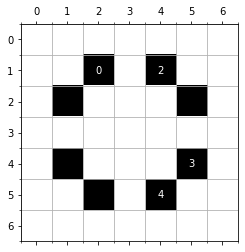

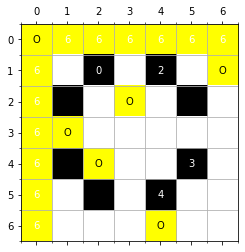

In [38]:
def is_valid_position(grid_map, i, j):
    row = grid_map[:, j]
    col = grid_map[i, :]
    valid = True
    if grid_map[i, j] in range(-1, 5):
        return False
    p1 = num_blocks.get((i+1, j))
    p2 = num_blocks.get((i-1, j))
    p3 = num_blocks.get((i, j+1))
    p4 = num_blocks.get((i, j-1))
    if p1 is not None and p1 < 1:
        return False
    if p2 is not None and p2 < 1:
        return False
    if p3 is not None and p3 < 1:
        return False
    if p4 is not None and p4 < 1:
        return False
    
    for r in range(i+1, 7):
        if row[r] == 5:
            valid = False
    for r in range(i-1, -1, -1):
        if row[r] == 5:
            valid = False
    for c in range(j+1, 7):
        if col[c] == 5:
            valid = False
    for c in range(j-1, -1, -1):
        if col[c] == 5:
            valid = False
    return valid
    
def calc_light_cells(grid_sol):
    grids = np.array(grid_sol)
    for i in range(7):
        for j in range(7):
            v = grids[i, j]
            if v == 5:
                for idx, y in np.ndenumerate(grids[i, :]):
                    if y == -2:
                        grids[i, idx] = 6
                    elif y != 5:
                        break
                for idx, x in np.ndenumerate(grids[:,j]):
                    if x == -2:
                        grids[idx, j] = 6
                    elif x != 5:
                        break
    return grids
# -2: espaco vazio, -1: parede, 0 a 4: n de lampadas que podem iluminar, 5: lampada, 6: blocos iluminados                    
def print_map(data, is_solution):
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['white','black', 'black', 'black', 'black', 'black', 'black'])
    if is_solution == True:
        cmap = colors.ListedColormap(['white','black', 'black', 'black', 'black', 'black', 'black', 'yellow', 'yellow'])
    ax.matshow(data, cmap=cmap)
    for (i, j), z in np.ndenumerate(data):
        c = 'black'
        if z > -1:
            c = 'white'
        if z == 5:
            c = 'black'
        if z == 5:
            ax.text(j, i, 'O', color = c,ha='center', va='center')
        elif z != -2:
            ax.text(j, i, z, color = c,ha='center', va='center')
        else:
            ax.text(j, i, ' ', color = c,ha='center', va='center')



    plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
    plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
    #ax.invert_yaxis()
    plt.grid(which='minor')
    plt.show()

grids = np.array(grid)
# Teste pra colocar lampadas e checar se as funcao is_valid_position funciona
for i in range(7):
    for j in range(7):
        if is_valid_position(grids, i, j) == True:
            grids[i, j] = 5
            # Atualiza numero de luzes que faltam iluminar os blocos
            p1 = num_blocks.get((i+1, j))
            p2 = num_blocks.get((i-1, j))
            p3 = num_blocks.get((i, j+1))
            p4 = num_blocks.get((i, j-1))
            if p1 is not None:
                num_blocks[(i+1, j)] = p1 - 1
            if p2 is not None:
                num_blocks[(i-1, j)] = p2 - 1
            if p3 is not None:
                num_blocks[(i, j+1)] = p3 - 1
            if p4 is not None:
                num_blocks[(i, j-1)] = p4 - 1
print(grids)
print(num_blocks)
            
print_map(grid, False)
print_map(calc_light_cells(grids), True)